# Capstone Project - CAR ACCIDENT SEVERITY

# Sasith Rajasooriya, Ph.D.

# 1.	Introduction 

## 1.1	Background

While the number of fatal motor vehicle accidents record a 2% decline from 2018 in USA, approximately 38800 people lost their lives in accidents. In addition about 4.4 million people have been injured enough to require medical attention.  Therefore, while the decreasing trend is a positive, observing insights into accident data is important so that suitable proposals could be made to implement policy decisions and informing people to reduce possible accidents further. 

The main observation affecting a particular driver on the road is “possible delay caused due to an accident”.  The severity of a particular accident can be assessed by the delay it would cause on the traffic. It is clear that the impact of an accident on traffic is highly proportionate to the severity of the accident. Therefore, if people (drivers) can be informed about the severity of possible accidents based particular factors such as weather condition, Wind Speed, Visibility etc. they can be more careful in driving and the choice of their driving routes. 

In this project I try different techniques to develop several machine lerning models that can predict the severity of road accidents given a set of variables elevant to accidents recorded. Then we will campare the performences of each of these different models and then chose a best model out of what I developed. 

A machine learning model which is successful in predicting the severity with a great accuracy will make sure following important informative measures are taken efficiently. 

(a). Succeesful machine learning model will illaborate a set of conditions (ex: temperature, windspeed, other weather conditions etc.) which are found to be highly related to accidents with higher level of severity (ex: degree 4 accidents. Then, if these conditions are present in a partular time (day, week, month etc), people in the considered areas can be informed to take extra care, to avoide particular routes, to use optional rules. Weather news alerts and radio news broadcasting stations in the areas can inform/alert drivers about these conditions and to take extra care. 

(b). Traffic Poloce officals and patroling secirity officials can be informed about these conditions prior and make sure additional security and road/highway support teams are allocated on these areas. 

(c). Signboard alerts, information boards on the roads can present alerts to drives accordingly.


(d). Road workers and related utility construction workers can also be informed prior for caution. 

## 1.2	The Problem 

### (Classification of Accidents based on severity)

Severity of road accidents is an important indication on the choice of the driving route and the attention on careful driving in specific environment conditions. Given the historical data on accidents, if there are successful models to predict the “severity” of a possible accident these can be used in informing people as mentioned under section 1.1. However, to do this we need to have effective models to "classify" accidents based on their severity. 

Objective of this project is to address this problem using available data and to develop a machine learning model to answer key problems given below.

1. “What is the severity of the probable accident in the USA under a set of certain conditions (features)? 

2. how can we classify to train and test effective machine learning models?


# 2. Data, Data Source and Feature Selection

## 2.1 Data and Data Source 

In this project I use the accident data in the United States in the “US Accidents” data set available in kaggle.com. This data set is openly available for research purposes hence usable in my project. The data set is developed from “Traffic Streaming Report APIs” and collected using streaming reports on important traffic events. The data set is maintained by its owner Sobhan Moosavi. The data set has 3513740 accident data recorded from 2016-02-01 to 2019-12-31, and further updated annually.

From over 3 million of accident data all over the United States, for this project I have chosen random samples to comply with the memory capacity of my machine that runs the algorithm.  Original data set has 49 attributes including both categorical and quantitative. 

## 2.2 Data

Before developing machine learning models, in the section 3 (Preprocessing), proper data cleaning and formatting will be conducted followed by a preliminary and descriptive analysis on the main variables. Then aiming at the perdition model development, a “Feature Set” will be obtained. To ensure the balance of the data set, severity column shall be observed for the number of accidents in each different category. Higher priority will be given to the accidents with the highest severity class. If the high severity accidents are a minority class, needed undersampling or oversampling technigues will be applied.

Among the variables, attributes Weather condition, Visibility, Wind Speed, Temperature, Air Pressure are key factors that would be considered in the model building. Attribute “Weather condition” in the data set has many categories of the inputs such as “clear, partly cloudy, Scattered cloudy, Mostly cloudy, Drizzle, Fair, Windy, Fog, Snow, Heavy Snow, Heavy rain, Heavy rain/windy, Windy”. These variables are clear indicators on the risk associated with the driving in a particular area. Therefore my feature set would hopefully would consist of these attributes. However, if there are too many levels of this variable priorty will be given to the variables which has the higest frequencies. In addition, check for independance among categorical varibles will be conducted in case more than one categorical attribute is included in the model feature set.

After conducting a suitable “exploratory analysis” and before the model selection procedures are applied “dimensionality reduction” approach also will be considered to check if that helps to reduce the dimention and the focus of the results.

Once the feature set is selected, suitable different machine learning approaches will be applied and assessed. 
Finally, after evaluating the model performances using different indices, the best model or models will be selected and presented with results. 


# 3. METHODOLOGY : PREPROCESSING

## 3.1 Loading and having an initial look into the Data set

Lets import the needed libraries for initial analysis. Also, lets set maxium number of display columns and raws to a higher number for the convenience. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_columns', 500)

Let's import the data set by reading the .csv file from my local harddrive. 

In [3]:
df_data_1=pd.read_csv("C:/Users/sas/Desktop/MyPython/US_Accidents_June20.csv")

In [4]:
df_data_1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect delays.,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US-35. Expect delays.,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Centerville Rd. Expect delays.,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


Dimention of the orginal data set:

In [5]:
df_data_1.shape

(3513740, 49)

Data types of the original dataset:

In [6]:
df_data_1.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

## 3.2 PREPROCESSING :Data Cleaning

### 3.2.1 Removing irrelevant and unusable variables

This is a big data set with over 3.5 million data points and 49 attributes.However, my analysis is conducted without cloud or parallel computing techniques. Mata data information about this data set is also available on kaggle.com and the same is uploaded with this project on Github. Reading the meta data we can understand that some variable recorded are relevant to the accident only from the administrative point of view. Such variables can be disregarded. 

-Following variables will be removed at first. 
'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
'Traffic_Calming','Traffic_Signal','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'. 



In [237]:
df1=df_data_1.drop(columns=['Amenity', 'Bump','Crossing', 'Give_Way', 'Junction', 'No_Exit','Railway', 'Roundabout', 'Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [8]:
df1.shape

(3513740, 33)

Further, there are geo spatial variables recorded in the data set. It should be noted that, some of these might be considered in a model development with a larger scope of qualitative and geo spatial context. But, my project scope mainly focus on the weather conditions and variables relevant to weather. The vaiavle Weather_Timestamp is a nominal variables with the time of the accident recorded hence not useful in my analaysis and model development. Thefroe, we can remove following set of variables too.

-'Source','TMC','End_Lat','End_Lng','Description','Number','Street','Side','Country',
'Timezone','Airport_Code','Weather_Timestamp'


In [9]:
df2=df1.drop(columns=['Source','TMC','End_Lat', 'End_Lng','Description','Number','Street','Side','Country','Timezone','Airport_Code','Weather_Timestamp'])
df2.shape

(3513740, 21)

Our "target" attribute is "Severity". Lets have a look at this column.

In [10]:
df2.Severity.value_counts()

2    2373299
3     998913
4     112353
1      29175
Name: Severity, dtype: int64

### 3.2.2 Dealing with the Missing data

#### Check for missing values

In [11]:
df_N=df2.replace(" ", np.nan)
df_N.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,Night
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Night
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day


In [12]:
md=df_N.isnull()
md.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


Count number of missing data values in each column

In [13]:
for column in md.columns.values.tolist():
    print(column)
    print(md[column].value_counts())
    print("")

ID
False    3513740
Name: ID, dtype: int64

Severity
False    3513740
Name: Severity, dtype: int64

Start_Time
False    3513740
Name: Start_Time, dtype: int64

End_Time
False    3513740
Name: End_Time, dtype: int64

Start_Lat
False    3513740
Name: Start_Lat, dtype: int64

Start_Lng
False    3513740
Name: Start_Lng, dtype: int64

Distance(mi)
False    3513740
Name: Distance(mi), dtype: int64

City
False    3513628
True         112
Name: City, dtype: int64

County
False    3513740
Name: County, dtype: int64

State
False    3513740
Name: State, dtype: int64

Zipcode
False    3512671
True        1069
Name: Zipcode, dtype: int64

Temperature(F)
False    3448004
True       65736
Name: Temperature(F), dtype: int64

Wind_Chill(F)
True     1868256
False    1645484
Name: Wind_Chill(F), dtype: int64

Humidity(%)
False    3444049
True       69691
Name: Humidity(%), dtype: int64

Pressure(in)
False    3457856
True       55884
Name: Pressure(in), dtype: int64

Visibility(mi)
False    3437879
True  

In [14]:
md.shape

(3513740, 21)

#### Summary of the information obtained on missing data.
Out of the 21 columns, 9 columns do not have any missing values, which is very good. Other 12 columns have missing values that we have to deal with. 

1. There are few several important quantitiative variables that we have priority consideration in building our model. Some other variables have other importance but not directly involved in our model. Therefore, we will first check the effect of the missing data in each of these attribute according to their nature. 

2. Variables precipitation and Windchill are missing a large portion of data values. However, there are other attributes which illustrates the same nature of effects that would be expected fro these two attributes (such as Weather condtion, Windspeed and Temperature). Therefore, we can drop these two variables from the dataframe. 

3. Attribute Windspeed is also missing over 10% of the values recorded. We will replace these missing values by the avearage windspeed. 

4. Other records with missing attributes values will be removed. 

In [15]:
df_N.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.513740e+06,3.513740e+06,3.513740e+06,3.513740e+06,3.448004e+06,1.645484e+06,3.444049e+06,3.457856e+06,3.437879e+06,3.059127e+06,1.487859e+06
mean,2.339935e+00,3.654208e+01,-9.579208e+01,2.816462e-01,6.193496e+01,5.355749e+01,6.511372e+01,2.974452e+01,9.122668e+00,8.218940e+00,1.598132e-02
std,5.522103e-01,4.883511e+00,1.736894e+01,1.550166e+00,1.862108e+01,2.377308e+01,2.275582e+01,8.322425e-01,2.885840e+00,5.262870e+00,1.928187e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.363793e+01,-1.174420e+02,0.000000e+00,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.000000e+00,3.591703e+01,-9.102632e+01,0.000000e+00,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.032258e+01,-8.093303e+01,1.000000e-02,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


### Possible data entry errors (Wind speed)

Record of the windspeed with 984 mph must be a data entry mistake. Therefore, we will drop that raw from our dataframe. In case there are more such errors in that column, lets have a look at that column.

In [16]:
dfws=df_N['Wind_Speed(mph)']
dfws=pd.DataFrame(dfws)
dfws.head()

,Wind_Speed(mph)
0,NaN
1,NaN
2,3.5
3,4.6
4,3.5


In [17]:
dfws_sorted=dfws.sort_values(by='Wind_Speed(mph)', ascending=False)
dfws_sorted.head(30)

,Wind_Speed(mph)
2880230,984.0
2490610,822.8
114652,822.8
114645,822.8
114585,822.8
114638,822.8
2490600,822.8
114593,822.8
1714870,703.1
1714869,703.1


It looks like that there are several data entry errors in the Wind Speed column. As per real records, the highest recorded Wind Speed in the history of US is around 231 mph, which is in 1984.
Therefore, keeping that in mind, we will remove accident records with winspeeds recorded over 200 mph for better accuracy.

In [18]:
df3=df_N.drop(df_N[df_N['Wind_Speed(mph)'] > 200].index, inplace = False)

In [19]:
df3.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,3.513711e+06,3.513711e+06,3.513711e+06,3.513711e+06,3.447977e+06,1.645477e+06,3.444022e+06,3.457827e+06,3.437850e+06,3.059098e+06,1.487852e+06
mean,2.339935e+00,3.654209e+01,-9.579199e+01,2.816483e-01,6.193494e+01,5.355753e+01,6.511382e+01,2.974452e+01,9.122670e+00,8.214381e+00,1.598139e-02
std,5.522097e-01,4.883515e+00,1.736894e+01,1.550173e+00,1.862109e+01,2.377303e+01,2.275577e+01,8.322455e-01,2.885846e+00,4.984807e+00,1.928192e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.363793e+01,-1.174419e+02,0.000000e+00,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.000000e+00,3.591718e+01,-9.102632e+01,0.000000e+00,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.032277e+01,-8.093302e+01,1.000000e-02,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,1.750000e+02,2.500000e+01


Now, error data entries from Wind Speed column are removed. Therefore, we can replace any missing records of wind speed by the average wind speed of the column. 

In [20]:
df3.shape

(3513711, 21)

In [21]:
df3['Wind_Speed(mph)'].isnull().sum()

454613

In [22]:
mean_WindSpeed=df3['Wind_Speed(mph)'].astype('float').mean(axis=0)
print("Average Wind Speed:", mean_WindSpeed)

Average Wind Speed: 8.214381428791697


In [23]:
df3['Wind_Speed(mph)'].replace(np.nan, mean_WindSpeed, inplace=True)

In [24]:
df3['Wind_Speed(mph)'].isnull().sum()

0

Missing data values in the Wind_Speed column is now replaced with the average Windspeed. Lets move to removing two columns Wind_Chill and Precipitation.

In [25]:
df4=df3.drop(columns=['Wind_Chill(F)','Precipitation(in)'])
df4.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,91.0,29.68,10.0,Calm,8.214381,Light Rain,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,100.0,29.65,10.0,Calm,8.214381,Light Rain,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,100.0,29.67,10.0,SW,3.500000,Overcast,Night
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,96.0,29.64,9.0,SW,4.600000,Mostly Cloudy,Night
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,89.0,29.65,6.0,SW,3.500000,Mostly Cloudy,Day


In [26]:
df4.shape

(3513711, 19)

Now lets drop all other rows with any mising data.

#### Note: df5 is the first data frame with no missing values with 3402846 rows and 19 attributes. 

In [27]:
df5=df4.dropna()
df5.shape

(3402846, 19)

Lets confirm that there are no missing values in the data frame

In [28]:
df5.isnull().values.any()

False

## 3.3 Exploratory Analysis on the variables before chosing the feature set

We can now obtain descriptive statistics on the data and look at each quantitative variable for their distrtribution through a histogram.

In [29]:
df5.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06,3.402846e+06
mean,2.338182e+00,3.653426e+01,-9.580557e+01,2.784780e-01,6.196677e+01,6.513318e+01,2.974571e+01,9.122411e+00,8.215800e+00
std,5.511117e-01,4.901260e+00,1.733790e+01,1.537528e+00,1.860005e+01,2.274934e+01,8.281320e-01,2.870008e+00,4.698650e+00
min,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.362516e+01,-1.174452e+02,0.000000e+00,5.000000e+01,4.900000e+01,2.973000e+01,1.000000e+01,5.000000e+00
50%,2.000000e+00,3.587602e+01,-9.100744e+01,0.000000e+00,6.400000e+01,6.700000e+01,2.995000e+01,1.000000e+01,8.100000e+00
75%,3.000000e+00,4.037007e+01,-8.096712e+01,1.000000e-02,7.590000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.000000e+02,5.774000e+01,1.400000e+02,1.750000e+02


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001375CF92EB0>]],
      dtype=object)

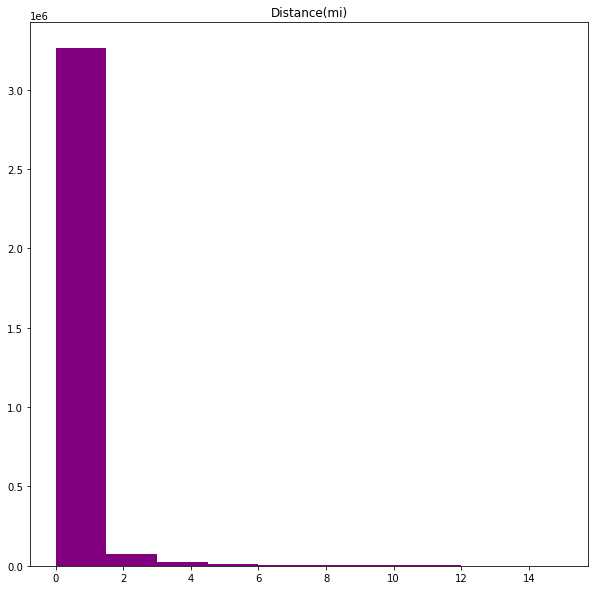

In [30]:
nbins = 100
xmin = 0
xmax = 15

Distanceplot=df5.hist(column='Distance(mi)', bins=10, grid=False, figsize=(10,10), color='purple', range=[xmin,xmax])
Distanceplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137C7F3E7F0>]],
      dtype=object)

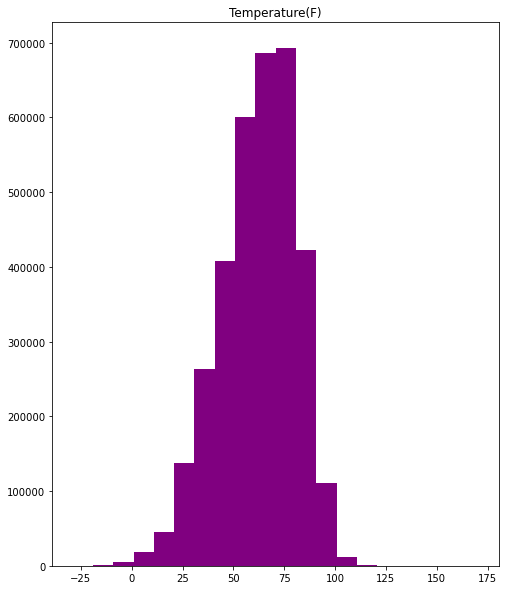

In [31]:
Tempplot=df5.hist(column='Temperature(F)', bins=20, grid=False, figsize=(8,10), color='purple')
Tempplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137C7D8DA00>]],
      dtype=object)

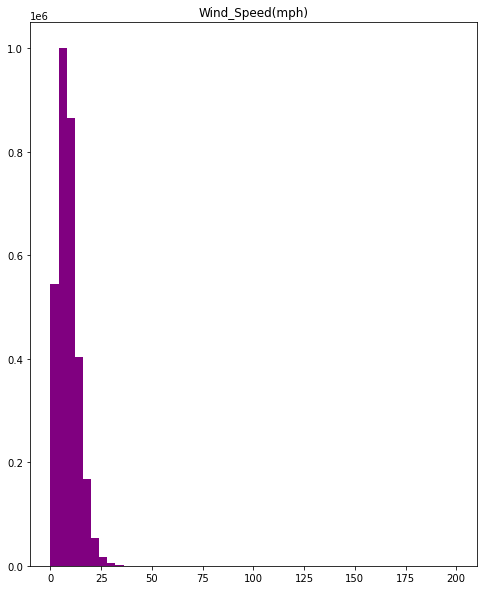

In [32]:
xmin = 0
xmax = 200
WS=df2.hist(column='Wind_Speed(mph)', bins=50, grid=False, figsize=(8,10), color='purple', range=[xmin,xmax])
WS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137C7D5ED00>]],
      dtype=object)

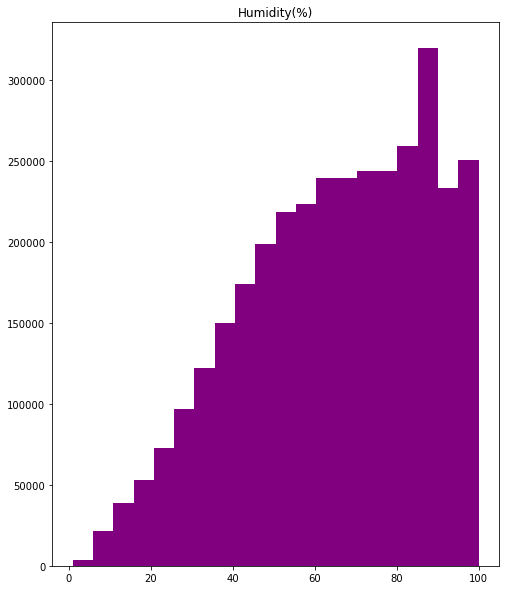

In [33]:
Humidity=df5.hist(column='Humidity(%)', bins=20, grid=False, figsize=(8,10), color='purple')
Humidity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137C818A370>]],
      dtype=object)

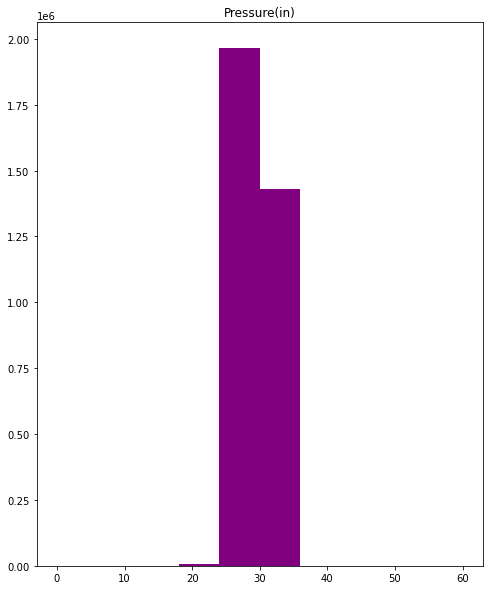

In [34]:
xmin = 0
xmax = 60

Pressure=df5.hist(column='Pressure(in)', bins=10, grid=False, figsize=(8,10), color='purple', range=[xmin,xmax])
Pressure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137C81D6D60>]],
      dtype=object)

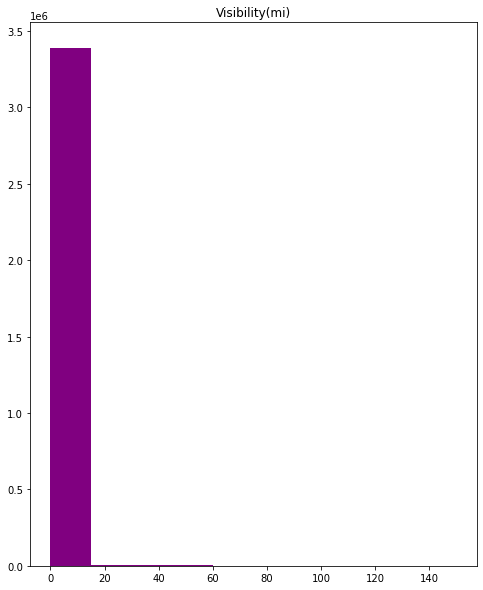

In [35]:
xmin = 0
xmax = 150

Visibility=df5.hist(column='Visibility(mi)', bins=10, grid=False, figsize=(8,10), color='purple', range=[xmin,xmax])
Visibility

### 3.3.1 Check for correlation and possible Multicolinearity among quantitative attributes 

Lets first get the correlation matirx to check for higly correlated pairs of attributes if any.

In [36]:
df5.corr()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Severity,1.000000,0.048074,0.080781,0.149823,-0.027094,0.034490,0.038070,-0.006538,0.034585
Start_Lat,0.048074,1.000000,-0.018528,0.063694,-0.426581,0.043504,-0.099053,-0.050111,0.053914
Start_Lng,0.080781,-0.018528,1.000000,0.048768,-0.061358,0.181011,0.147191,-0.047099,0.084428
Distance(mi),0.149823,0.063694,0.048768,1.000000,-0.038270,0.019242,-0.026468,-0.011383,0.014547
Temperature(F),-0.027094,-0.426581,-0.061358,-0.038270,1.000000,-0.338875,-0.021139,0.181904,-0.006169
Humidity(%),0.034490,0.043504,0.181011,0.019242,-0.338875,1.000000,0.112170,-0.383826,-0.143815
Pressure(in),0.038070,-0.099053,0.147191,-0.026468,-0.021139,0.112170,1.000000,-0.012475,0.000544
Visibility(mi),-0.006538,-0.050111,-0.047099,-0.011383,0.181904,-0.383826,-0.012475,1.000000,0.015000
Wind_Speed(mph),0.034585,0.053914,0.084428,0.014547,-0.006169,-0.143815,0.000544,0.015000,1.000000


#### This is excellent! As per the correlation matrix, there is no strong linear correlation among numerical variables. 

Since the correlation matrix shows that there is no significant or strong correlation among the variables, I am satisfied that possible multicolinearity among numerical variables is avoided. 

Inaddition to these numerical variables, we have two possible categorical variables those could be in the feature set. They are Weather condition and the Sunrise_Sunset. Before proceeing, we should check for their independance too. 


### 3.3.2 Check for possible Multicolinearity among categorical attributes 

#### Chi-Square Test for independance:

There are two categorical atttributes left in our updated data set. They are'Weather_Condition' and'Sunrise_Sunset'. Before I proceed we need to check if they are independent from eachother to keep in the model. If not,  one of them should be dropped. Let's conduct a Chi-Square test for the independance. 

In [37]:
! conda install -c conda-forge python-utils --yes

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

## Package Plan ##

  environment location: C:\Users\hitigap\Anaconda3

  added / updated specs:
    - python-utils


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py38h32f6830_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                                4.8.4-py38h32f6830_2 --> 4.8.5-py38h32f6

In [38]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [40]:
%matplotlib inline

In [41]:
from matplotlib import pyplot

In [42]:
import matplotlib.pyplot as plt

In [43]:
df5.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [44]:
CT=pd.crosstab(df5['Weather_Condition'], df5['Sunrise_Sunset'])
print(CT)

Sunrise_Sunset           Day  Night
Weather_Condition                  
Blowing Dust              62     11
Blowing Dust / Windy     110      7
Blowing Sand               1      0
Blowing Snow             228    107
Blowing Snow / Windy      56      6
...                      ...    ...
Volcanic Ash              18      3
Widespread Dust          128     20
Widespread Dust / Windy    1      0
Wintry Mix               863    814
Wintry Mix / Windy        28     12

[126 rows x 2 columns]


Next, we have to address the Categorical variable "Weather Condition" which has several levels. Lets first observe this attribute and its categories.

In [45]:
CT

Sunrise_Sunset,Day,Night
Weather_Condition,,
Blowing Dust,62,11
Blowing Dust / Windy,110,7
Blowing Sand,1,0
Blowing Snow,228,107
Blowing Snow / Windy,56,6
...,...,...
Volcanic Ash,18,3
Widespread Dust,128,20
Widespread Dust / Windy,1,0


In [46]:
Observed=CT.values

In [47]:
Observed

array([[    62,     11],
       [   110,      7],
       [     1,      0],
       [   228,    107],
       [    56,      6],
       [567150, 233757],
       [143385,  66950],
       [  3351,    949],
       [     0,      1],
       [  1691,    784],
       [     6,      3],
       [    75,     55],
       [     1,      0],
       [400704, 137818],
       [  7033,    846],
       [ 19241,  11384],
       [    85,     14],
       [     0,      1],
       [     5,     15],
       [     1,      0],
       [    17,      1],
       [     2,      0],
       [ 31674,   6413],
       [   158,     23],
       [     4,      0],
       [   176,    101],
       [     1,      1],
       [     2,      0],
       [     3,      1],
       [ 10942,   4212],
       [   228,     74],
       [     3,      0],
       [     7,      0],
       [     6,      0],
       [     0,      1],
       [  1245,    225],
       [    51,     10],
       [     6,      0],
       [  1610,    469],
       [   199,     53],


In [48]:
Expected=stats.chi2_contingency(CT)

In [49]:
Expected

(52275.42944635935,
 0.0,
 125,
 array([[5.39379643e+01, 1.90620357e+01],
        [8.64485181e+01, 3.05514819e+01],
        [7.38876223e-01, 2.61123777e-01],
        [2.47523535e+02, 8.74764653e+01],
        [4.58103258e+01, 1.61896742e+01],
        [5.91771139e+05, 2.09135861e+05],
        [1.55411530e+05, 5.49234696e+04],
        [3.17716776e+03, 1.12283224e+03],
        [7.38876223e-01, 2.61123777e-01],
        [1.82871865e+03, 6.46281348e+02],
        [6.64988601e+00, 2.35011399e+00],
        [9.60539090e+01, 3.39460910e+01],
        [7.38876223e-01, 2.61123777e-01],
        [3.97901101e+05, 1.40620899e+05],
        [5.82160576e+03, 2.05739424e+03],
        [2.26280843e+04, 7.99691567e+03],
        [7.31487461e+01, 2.58512539e+01],
        [7.38876223e-01, 2.61123777e-01],
        [1.47775245e+01, 5.22247554e+00],
        [7.38876223e-01, 2.61123777e-01],
        [1.32997720e+01, 4.70022799e+00],
        [1.47775245e+00, 5.22247554e-01],
        [2.81415787e+04, 9.94542129e+03],
  

In [50]:
no_rows=len(CT.iloc[0:126,0])
no_columns=len(CT.iloc[0,0:2])
dof=(no_rows-1)*(no_columns-1)
print("Degree of Freedom is:", dof)
alpha=0.05

Degree of Freedom is: 125


In [51]:
from scipy.stats import chi2
chi_sq=sum([(o-e)**2./e for o,e in zip(Observed,Expected)])
chi_sq_stat=chi_sq[0]+chi_sq[1]

<ipython-input-51-044d7f634508>:2: RuntimeWarning: divide by zero encountered in true_divide
  chi_sq=sum([(o-e)**2./e for o,e in zip(Observed,Expected)])


In [52]:
print("Chi-square statistic is :",chi_sq_stat)

Chi-square statistic is : [inf inf]


In [53]:
critical_value=chi2.ppf(q=1-alpha, df=dof)
print('critical_value:', critical_value)

critical_value: 152.0938756919578


In [54]:
p_value=1-chi2.cdf(x=chi_sq_stat, df=dof)
print('p-value:', p_value)
print('significance level:',alpha)
print('Degree of freedom:', dof)

p-value: [0. 0.]
significance level: 0.05
Degree of freedom: 125


#### Chi Square rest results 
As the p-value of the Chi-Square test is close to 0, we reject the null hypothesis and conclude that, these weather condition and sunrise_sunset (day or night) variables are not independant. Therefore, we will drop the column "Sunrise_Sunset" from the moel and go ahead with weather condition only.

In [55]:
df5.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset'],
      dtype='object')

In [56]:
df6=df5.drop(columns=['Sunrise_Sunset'])
df6.shape

(3402846, 18)

## 3.3.3 Exploring the "target" (Label) attribute - "Severity"

Our objective is to predict the "Severity". Lets first explore this attribute column and ints destribution.

In [57]:
severity_counts=df6.Severity.value_counts()
severity_counts

2    2302403
3     964484
4     107419
1      28540
Name: Severity, dtype: int64

In [58]:
relative_severity_counts=df6.Severity.value_counts(normalize=True)
relative_severity_counts

2    0.676611
3    0.283435
4    0.031567
1    0.008387
Name: Severity, dtype: float64

We see that severity level 2 and 3 cover over 95% of the data set. Severity lvel 1 is below 0.8% of all recorded accidents. However, 3.1% of all the accidents are categorized into Severity 4. Our focus is importnat on Severity level 4 than any other category since our models ability to predict severity 4 is very important. Since, Severty 1 accidents are of a negligable amount, for simplicity we can merge severity 1 and 2 together. 

In [59]:
df6.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'City', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition'],
      dtype='object')

#### Lets Merge the Severity class 1 and 2 into one class. 

In [60]:
df6['Severity_merged']=df6['Severity']
df6.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity_merged
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,91.0,29.68,10.0,Calm,8.214381,Light Rain,3
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,100.0,29.65,10.0,Calm,8.214381,Light Rain,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,100.0,29.67,10.0,SW,3.500000,Overcast,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,96.0,29.64,9.0,SW,4.600000,Mostly Cloudy,3
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,89.0,29.65,6.0,SW,3.500000,Mostly Cloudy,2


In [61]:
df6.dtypes

ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
City                  object
County                object
State                 object
Zipcode               object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Weather_Condition     object
Severity_merged        int64
dtype: object

Now let's replace all the "1"s in Severity_merged column in to "2".

In [62]:
df6["Severity_merged"].replace({1: 2}, inplace=True)

Lets check the categories in the column "Severity_merged"

In [63]:
SMC=df6.Severity_merged.value_counts()
SMC=pd.DataFrame(SMC)
SMC

,Severity_merged
2,2330943
3,964484
4,107419


Now we have merged severity levels 1 and 2 together as new severity level "2". 

In [64]:
SC=df6.Severity.value_counts()
SC=pd.DataFrame(SC)
SC

,Severity
2,2302403
3,964484
4,107419
1,28540


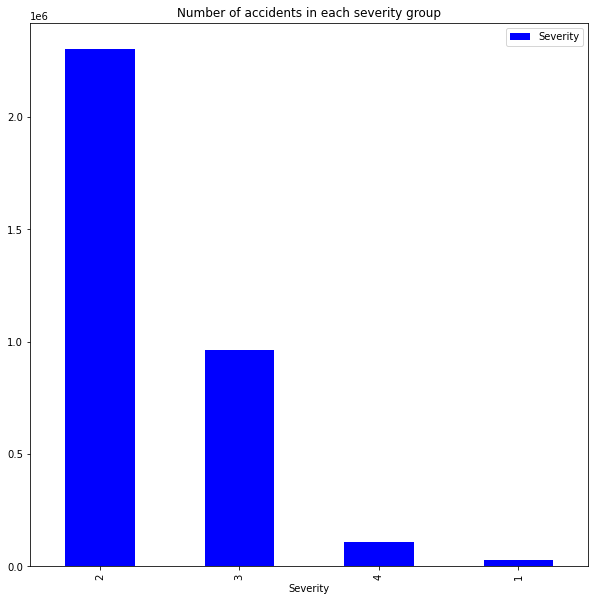

In [65]:
SC.plot(kind='bar', figsize=(10,10), color='blue')
plt.xlabel('Severity')
plt.title('Number of accidents in each severity group')
plt.show()

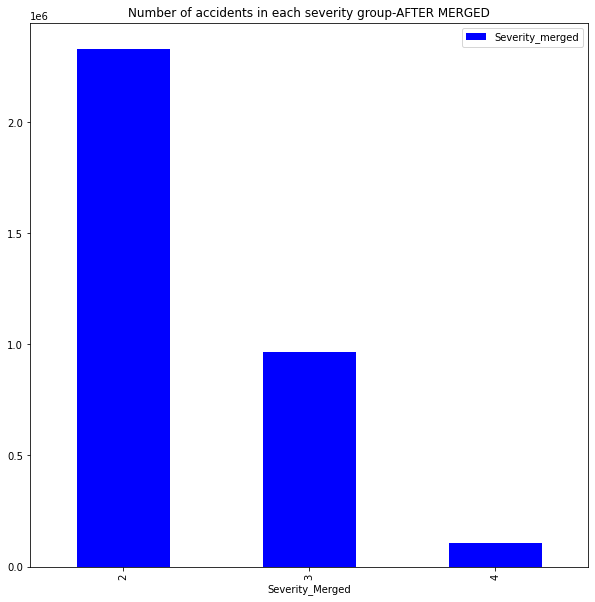

In [238]:
SMC.plot(kind='bar', figsize=(10,10), color='blue')
plt.xlabel('Severity_Merged')
plt.title('Number of accidents in each severity group-AFTER MERGED')
plt.show()

As a double check for any errors in the merging steps, lets check if there are any missing values in the new dataframe.

In [67]:
df6.isnull().values.any()

False

## 3.3.4 Preprocessing categorical feature "Weather_Condition" for model building

As evedent in below outputs, only categorical variable we have in our dataframe has 126 different categories (levels) of different weather conditions. AHandling such a big number of levels is difficult and mostly unnecessary. When I looked into the value counts, it was clear that out of 126 categories only 8 categoroes have occured at frequencies higer than 100,000. Many variables are there that occured only very few times including only once. Therefore, we will re organize this attribute by bringing down from 126 to 20 levels with the higest frequencies and adding all other conditions in to one category called "Other Weather Conditions". 

In [239]:
df6.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity_merged,Weather_Condition_Selected
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,91.0,29.68,10.0,Calm,8.214381,Light Rain,3,Light Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,100.0,29.65,10.0,Calm,8.214381,Light Rain,2,Light Rain
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,100.0,29.67,10.0,SW,3.500000,Overcast,2,Overcast
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,96.0,29.64,9.0,SW,4.600000,Mostly Cloudy,3,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,89.0,29.65,6.0,SW,3.500000,Mostly Cloudy,2,Mostly Cloudy


In [69]:
df6.Weather_Condition.value_counts()

Clear                        800907
Fair                         538522
Mostly Cloudy                484855
Overcast                     378965
Partly Cloudy                342143
                              ...  
Thunder and Hail / Windy          1
Heavy Smoke                       1
Sand / Dust Whirls Nearby         1
Blowing Sand                      1
Freezing Drizzle                  1
Name: Weather_Condition, Length: 126, dtype: int64

In [70]:
WC=pd.DataFrame(df6.Weather_Condition.value_counts())

In [71]:
WC.head(20)

,Weather_Condition
Clear,800907
Fair,538522
Mostly Cloudy,484855
Overcast,378965
Partly Cloudy,342143
Cloudy,210335
Scattered Clouds,203398
Light Rain,175377
Light Snow,50081
Rain,41406


In [72]:
df7=df6
df7.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity_merged
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,91.0,29.68,10.0,Calm,8.214381,Light Rain,3
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,100.0,29.65,10.0,Calm,8.214381,Light Rain,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,100.0,29.67,10.0,SW,3.500000,Overcast,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,96.0,29.64,9.0,SW,4.600000,Mostly Cloudy,3
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,89.0,29.65,6.0,SW,3.500000,Mostly Cloudy,2


In [73]:
col="Weather_Condition"

In [74]:
top = min([df7['Weather_Condition'].nunique(), 20])

In [75]:
df7_mapper = df7['Weather_Condition'].value_counts()

In [76]:
df7_mapper.iloc[:top] = df7_mapper.index[:top]

In [77]:
df7_mapper.iloc[top:len(df7_mapper)] = f'Other_{col}'

In [78]:
df7[f'{col}_Selected'] = df7[col].map( df7_mapper ) # make a new column with the top 49+Other

# Now do dummies on data_frame[f'{col}.Selected']

In [79]:
df7.shape

(3402846, 20)

In [80]:
df7.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity_merged,Weather_Condition_Selected
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,Montgomery,OH,45424,36.9,91.0,29.68,10.0,Calm,8.214381,Light Rain,3,Light Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,Franklin,OH,43068-3402,37.9,100.0,29.65,10.0,Calm,8.214381,Light Rain,2,Light Rain
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,Clermont,OH,45176,36.0,100.0,29.67,10.0,SW,3.500000,Overcast,2,Overcast
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,Montgomery,OH,45417,35.1,96.0,29.64,9.0,SW,4.600000,Mostly Cloudy,3,Mostly Cloudy
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,Montgomery,OH,45459,36.0,89.0,29.65,6.0,SW,3.500000,Mostly Cloudy,2,Mostly Cloudy


In [81]:
df7.Weather_Condition_Selected.value_counts()

Clear                           800907
Fair                            538522
Mostly Cloudy                   484855
Overcast                        378965
Partly Cloudy                   342143
Cloudy                          210335
Scattered Clouds                203398
Light Rain                      175377
Light Snow                       50081
Other_Weather_Condition          49089
Rain                             41406
Haze                             38087
Fog                              30625
Heavy Rain                       15154
Light Drizzle                    12325
Fair / Windy                      7879
Snow                              5707
Light Thunderstorms and Rain      4908
Mostly Cloudy / Windy             4425
Thunderstorm                      4358
Cloudy / Windy                    4300
Name: Weather_Condition_Selected, dtype: int64

## 3.4 Making the Feature set X and Target set

### 3.4.1 Numerical section
Let's extract the numerical variables which are candicates to be in the Feature Set of attributes.

In [82]:
FeatureNum=pd.DataFrame(df7, columns=["Distance(mi)","Temperature(F)","Humidity(%)","Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)"])

In [83]:
FeatureNum.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,0.01,36.9,91.0,29.68,10.0,8.214381
1,0.01,37.9,100.0,29.65,10.0,8.214381
2,0.01,36.0,100.0,29.67,10.0,3.500000
3,0.01,35.1,96.0,29.64,9.0,4.600000
4,0.01,36.0,89.0,29.65,6.0,3.500000


In [84]:
FeatureNum.isnull().values.any()

False

### 3.4.2 Categorical section (making dummies)
Now lets get dummies for Weather_Condition using the new column we created prioratizing most frequest weather condtions.

In [85]:
dummy1=pd.get_dummies(df7['Weather_Condition_Selected'])
dummy1.head()

,Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [86]:
dummy1.shape

(3402846, 21)

In [87]:
dummy1.isnull().values.any()

False

In [88]:
df7.dtypes

ID                             object
Severity                        int64
Start_Time                     object
End_Time                       object
Start_Lat                     float64
Start_Lng                     float64
Distance(mi)                  float64
City                           object
County                         object
State                          object
Zipcode                        object
Temperature(F)                float64
Humidity(%)                   float64
Pressure(in)                  float64
Visibility(mi)                float64
Wind_Direction                 object
Wind_Speed(mph)               float64
Weather_Condition              object
Severity_merged                 int64
Weather_Condition_Selected     object
dtype: object

### 3.4.3 Target set 
Let's also define a data frame for target variable "Severity_merged".

In [89]:
Severity_merged=pd.DataFrame(df7, columns=["Severity_merged"])

In [90]:
Severity_merged.head()

,Severity_merged
0,3
1,2
2,2
3,3
4,2


### 3.4.4 Combine Feature set and target set 

In [91]:
Frames= [Severity_merged,FeatureNum,dummy1]

In [92]:
df8=pd.concat(Frames, axis=1)

In [93]:
df8.shape

(3402846, 28)

In [94]:
df8.head()

,Severity_merged,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
0,3,0.01,36.9,91.0,29.68,10.0,8.214381,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,0.01,37.9,100.0,29.65,10.0,8.214381,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2,0.01,36.0,100.0,29.67,10.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,0.01,35.1,96.0,29.64,9.0,4.600000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2,0.01,36.0,89.0,29.65,6.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [95]:
df8.isnull().values.any()

False

#### Store processed data frame in csv and pkl formats for later use

In [96]:
df8.to_csv("C:/Users/sas/Desktop/MyPython/DF8.csv")

In [97]:
df8.to_pickle("C:/Users/sas/Desktop/MyPython/DF8.pkl")

# 3.5 Dimensionality Reduction effort

Now we have the complete and cleaned data set for our processing. Lets feed the data into PCA (Principle Component analysis)

# PCA

In [98]:
y=df8['Severity_merged']
X=df8.drop('Severity_merged', axis=1)

In [100]:
y.shape

(3402846,)

### Lets import the needed libraries for PCA

In [99]:
! conda install -c conda-forge imbalanced-learn --yes

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::ca-certificates-2020.6.24-0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0done

# All requested packages already installed.



In [102]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

### Normalize X 

In [103]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [104]:
scaled_X=scaler.transform(X)

In [105]:
scaled_X

array([[-0.17461663, -1.34767252,  1.13703602, ..., -0.25213655,
        -0.04098711, -0.0358097 ],
       [-0.17461663, -1.29390921,  1.53265191, ..., -0.25213655,
        -0.04098711, -0.0358097 ],
       [-0.17461663, -1.39605949,  1.53265191, ..., -0.25213655,
        -0.04098711, -0.0358097 ],
       ...,
       [ 0.18375077,  0.59318269, -0.04981163, ..., -0.25213655,
        -0.04098711, -0.0358097 ],
       [ 0.32098402,  0.48565609,  0.69746282, ..., -0.25213655,
        -0.04098711, -0.0358097 ],
       [ 0.1681413 ,  0.9157625 , -0.79708608, ..., -0.25213655,
        -0.04098711, -0.0358097 ]])

In [106]:
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
0,-0.174617,-1.347673,1.137036,-0.079346,0.305779,-0.000302,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,4.289876,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
1,-0.174617,-1.293909,1.532652,-0.115572,0.305779,-0.000302,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,4.289876,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
2,-0.174617,-1.396059,1.532652,-0.091421,0.305779,-1.003650,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,2.824768,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
3,-0.174617,-1.444446,1.356823,-0.127648,-0.042652,-0.769540,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,2.453217,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
4,-0.174617,-1.396059,1.049121,-0.115572,-1.087945,-1.003650,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,2.453217,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581


In [107]:
pca=PCA(n_components=2)

In [108]:
pca.fit(scaled_X)

PCA(n_components=2)

In [109]:
X_pca=pca.transform(scaled_X)

In [110]:
scaled_X.shape

(3402846, 27)

In [111]:
X_pca.shape

(3402846, 2)

In [112]:
X_pca

array([[-1.94025073,  0.10592512],
       [-2.12256753,  0.12144363],
       [-1.83620733, -0.41125914],
       ...,
       [ 0.78911277,  0.12107131],
       [ 0.44994682,  1.57076997],
       [ 0.93005004,  2.42609653]])

In [113]:
print(pca.explained_variance_ratio_)

[0.08158462 0.05659271]


In [114]:
#Xdf_pca = pd.DataFrame(X_pca)
#Xdf_pca.head()

In [115]:
#column_map = {i: 'PC{}'.format(i + 1) for i in X_pca.columns}
#X_pca.rename(mapper=column_map, copy=False, inplace=True, axis=1)
#X_pca['target'] = y

In [116]:
#X_pca.head()

Text(0, 0.5, 'Second principle component')

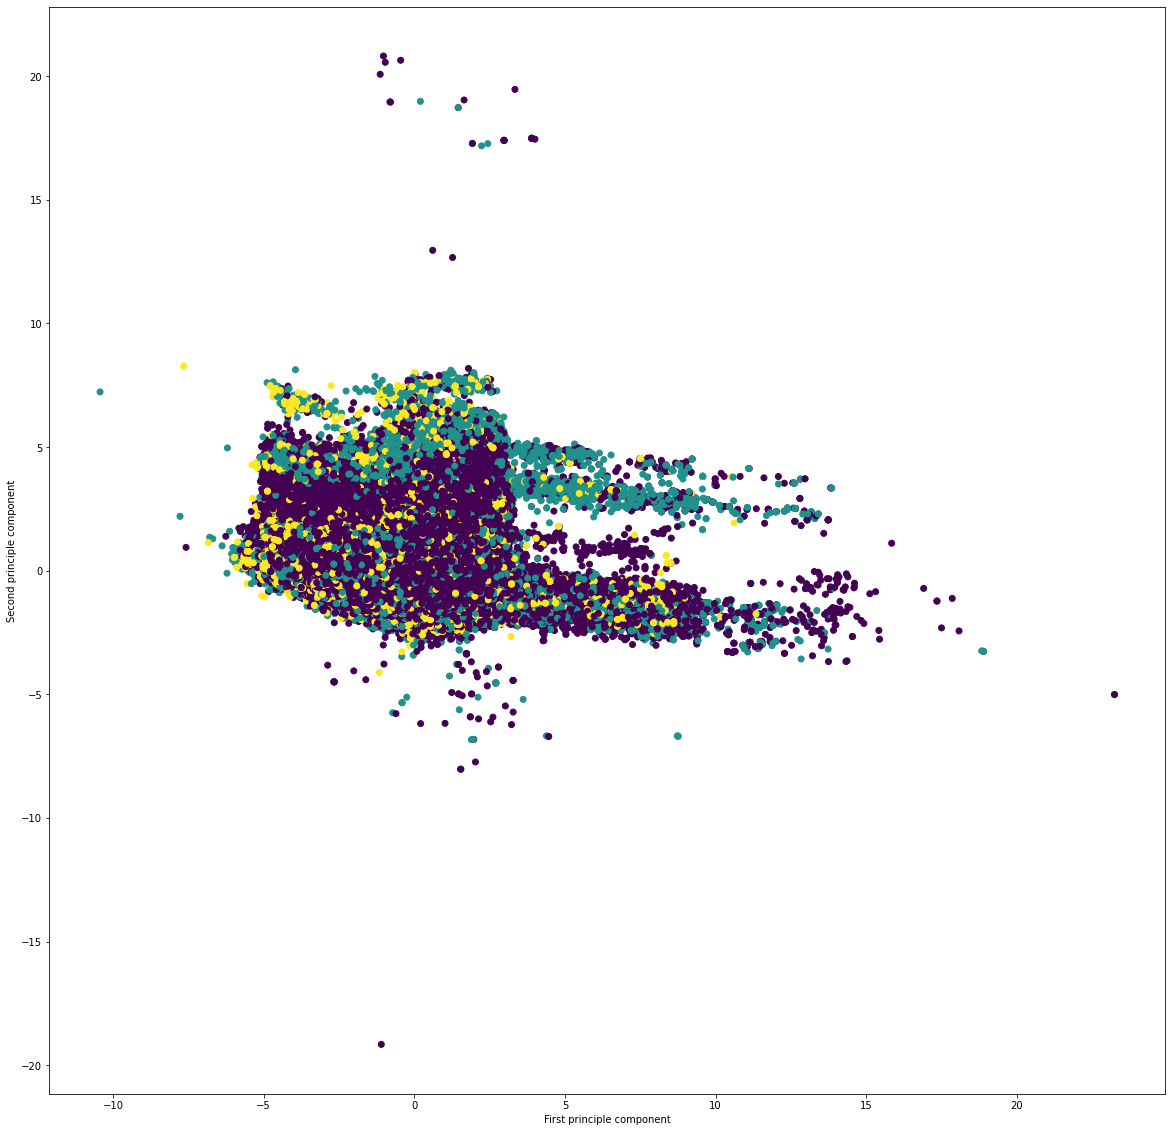

In [117]:
plt.figure(figsize=(20,20))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# PCA unsuccessful 

As the plot and the explained vairaces of the chosed components suggest PCA did not help us well in REDUCING THE DIMENTIONALITY of the accidents severity feature set. Explained variances added up below 95% of the vairiance (first component about 81.6% and the second component 5.6% didnt add up to atleast 95% of the variation. Also the scatter plot illustrates that no clear classification or seperation. These are probably because of the principle components chosen does not do a good job in explaining the severity of an accident, or it may be attributes in the data set does not account well for the severity of an accident. 

We will keep these results in mind and move forward to check for other classification methods. 

# 4. METHODOLOGY :
# SAMPLING AND BALANCING THE SAMPLES

### Lets import the needed resources for the analysis and model building and evaluation.

In [101]:
import time
from IPython.display import Image

# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb

# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)



import warnings
warnings.filterwarnings('ignore')

#### Feature Set and Normalized Feature set

In [118]:
X.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
0,0.01,36.9,91.0,29.68,10.0,8.214381,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.01,37.9,100.0,29.65,10.0,8.214381,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.01,36.0,100.0,29.67,10.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.01,35.1,96.0,29.64,9.0,4.600000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.01,36.0,89.0,29.65,6.0,3.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [119]:
scaled_X.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
0,-0.174617,-1.347673,1.137036,-0.079346,0.305779,-0.000302,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,4.289876,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
1,-0.174617,-1.293909,1.532652,-0.115572,0.305779,-0.000302,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,4.289876,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
2,-0.174617,-1.396059,1.532652,-0.091421,0.305779,-1.003650,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,2.824768,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
3,-0.174617,-1.444446,1.356823,-0.127648,-0.042652,-0.769540,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,2.453217,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581
4,-0.174617,-1.396059,1.049121,-0.115572,-1.087945,-1.003650,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,2.453217,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581


In [120]:
X.shape

(3402846, 27)

In [121]:
scaled_X.shape

(3402846, 27)

# 4.1 Balancing the Data
Before proceeding,let's remind that our data set is not a balanced one. It is mostly observed that accident severity data is highly imbalanced. Therefore, in case our data set is imbalanced, we need to take steps to make the data set balanced using steps such as Random Undersampling from majority subsets. 

Lets remind the distribution plot of the accident severity value counts where we merged severity levels one and 2 together. We know that the hig severe accident category is now the minority in our data. 

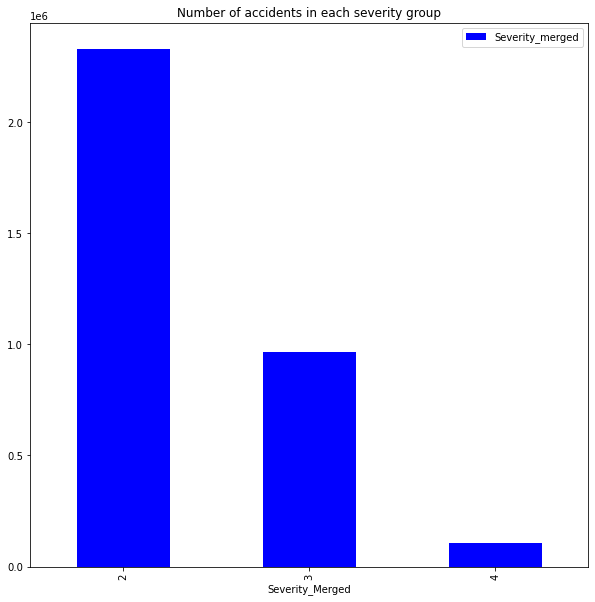

In [122]:
SMC.plot(kind='bar', figsize=(10,10), color='blue')
plt.xlabel('Severity_Merged')
plt.title('Number of accidents in each severity group')
plt.show()

# 4.2 Making a Main Random Sample

For processing convenience, first make a random sample of the size 15000 from our cleaned data set df8. Taking this step was compeled since when I ran the entire data set or a larger sample without high power cloud computing or similar techniques, the Kernal did not run due to memory limitations. However, sample of size 15000 including all categories is a reasonable and representative random sample so we can proceed with our model development with that.

In [123]:
MainSample=pd.DataFrame(df8.sample(15000))

In [124]:
MainSample.shape

(15000, 28)

In [125]:
MainSample.head()

,Severity_merged,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm
2990044,2,0.0,41.0,76.0,30.09,10.0,3.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
992452,2,0.0,109.0,9.0,28.15,6.0,12.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2312933,2,0.0,51.6,57.0,30.31,10.0,8.214381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
833018,2,0.0,60.0,86.0,29.62,10.0,8.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1237454,2,0.0,62.0,72.0,29.18,10.0,14.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [126]:
y_Main=MainSample['Severity_merged']
X_Main=MainSample.drop('Severity_merged', axis=1)

In [127]:
MainSample.to_csv("C:/Users/sas/Desktop/MyPython/MainSample.csv")

Lets check the value counts of Severity_merged column.

In [128]:
MainSample.Severity_merged.value_counts()

2    10121
3     4374
4      505
Name: Severity_merged, dtype: int64

## Normalize X 

In [130]:
scaler=StandardScaler()
scaler.fit(X_Main)

StandardScaler()

In [131]:
scaled_X_Main=scaler.transform(X_Main)

In [132]:
scaled_X_Main

array([[-0.19556066, -1.12852154,  0.46724494, ..., -0.24768082,
        -0.04476615, -0.0316386 ],
       [-0.19556066,  2.53655123, -2.46459557, ..., -0.24768082,
        -0.04476615, -0.0316386 ],
       [-0.19556066, -0.55720137, -0.36417252, ..., -0.24768082,
        -0.04476615, -0.0316386 ],
       ...,
       [-0.19556066,  0.00872898, -1.54566048, ..., -0.24768082,
        -0.04476615, -0.0316386 ],
       [ 0.16791394, -0.81052258, -0.18913726, ..., -0.24768082,
        -0.04476615, -0.0316386 ],
       [-0.19556066,  0.4345242 , -2.07076625, ..., -0.24768082,
        -0.04476615, -0.0316386 ]])

## Train Test Split of Main sample

In [133]:
X_train_Main, X_test_Main, y_train_Main, y_test_Main = train_test_split(scaled_X_Main, y_Main,test_size=.3,
                                                                            random_state=None)

# 4.3 Generating the undersample based on the Minority class

In order to treat the imbalance nature of classes in the target variable Severity, we will train every model using two different variations of the dataset.

The first variation will be the main sample. In this case, what we have is an impalanced dataset. The second variation will be an undersampled version of the dataset as obtained in this section below. In this variation, only the class with the least amount of samples will remain as it. In my current data set, that is the class of severity 4. 

In [141]:
# Undersamples variation
# ----------------------

# Generate variation
rus = RandomUnderSampler(random_state=None)
X_under, y_under = rus.fit_sample(scaled_X, y)
undersampled_data = pd.DataFrame(X_under, columns=X.columns)
undersampled_data['Severity'] = y_under
undersampled_data.to_csv("C:/Users/sas/Desktop/MyPython/undersample.csv", index=False)

In [142]:
undersampled_data=pd.read_csv("C:/Users/sas/Desktop/MyPython/undersample.csv")

In [143]:
undersampled_data.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm,Severity
0,-0.181121,-0.584234,1.049121,0.089709,-1.436376,1.933364,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,2.824768,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
1,0.426998,1.077052,0.609548,0.403669,0.305779,-0.514148,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,2.453217,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
2,-0.181121,-0.535847,0.653505,0.331217,0.305779,-1.003650,1.802426,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
3,-0.174617,-0.740147,-1.456446,0.174237,0.305779,-0.000302,1.802426,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
4,-0.181121,-1.181006,-1.500403,-0.622738,0.305779,0.166899,-0.554808,-0.256679,-0.03557,2.306266,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2


In [144]:
undersampled_data.shape

(322257, 28)

In [145]:
undersampled_data.Severity.value_counts()

4    107419
3    107419
2    107419
Name: Severity, dtype: int64

In [146]:
Sample_df=undersampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(min(len(x), 5000)))

In [147]:
Sample_df.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Clear,Cloudy,Cloudy / Windy,Fair,Fair / Windy,Fog,Haze,Heavy Rain,Light Drizzle,Light Rain,Light Snow,Light Thunderstorms and Rain,Mostly Cloudy,Mostly Cloudy / Windy,Other_Weather_Condition,Overcast,Partly Cloudy,Rain,Scattered Clouds,Snow,Thunderstorm,Severity
104836,-0.181121,-0.105740,0.169975,0.427820,0.305779,-1.110064,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,2.990934,-0.110986,-0.252137,-0.040987,-0.03581,2
3054,-0.181121,-1.019716,0.917249,-0.828019,0.305779,-1.748545,-0.554808,-0.256679,-0.03557,2.306266,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
52630,-0.181121,0.915763,0.829335,0.234614,0.305779,-1.110064,-0.554808,-0.256679,-0.03557,2.306266,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2
103738,-0.181121,-0.584234,-1.060830,0.778005,0.305779,-0.024645,-0.554808,-0.256679,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,2.990934,-0.110986,-0.252137,-0.040987,-0.03581,2
69499,-0.181121,0.324366,-0.313556,0.403669,0.305779,1.018208,-0.554808,3.895924,-0.03557,-0.433601,-0.048175,-0.095297,-0.106393,-0.066882,-0.060292,-0.233107,-0.122218,-0.038005,-0.407628,-0.036084,-0.120984,-0.354011,-0.334344,-0.110986,-0.252137,-0.040987,-0.03581,2


In [148]:
Sample_df.shape

(15000, 28)

Lets define Feature set and label set before applying classification algorithms.

In [149]:
y_under=Sample_df['Severity']
X_under=Sample_df.drop('Severity', axis=1)

## Train Test Split of under sample

In [150]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under,test_size=.3,
                                                                            random_state=None)

In [151]:
print ('Train set:', X_train_under.shape, y_train_under.shape)
print ('Test set:', X_test_under.shape, y_test_under.shape)

Train set: (10500, 27) (10500,)
Test set: (4500, 27) (4500,)


# 5. RESULTS  

## CLASSIFICATION

In this section section we execute the algorithms of classification machine learning. As mentioned above for each classifiers we will train and evaluate two models (one with the imbalanced data and the other is with the balanced data). Then we will compare the performances of these classifiers and will try to chose a best one. 

We will use the following classifiers in this section

1. KNN 
2. SVM 
3. Random Forrest 

# 5.1 KNN (K- nearest neighbors)

K-Nearest Neighbors is an algorithm for supervised learning where the data is ‘trained’ with
data points corresponding to their classification. Our objective is also to predict the class of "severity" in accidents. Therefore we can use KNN in our classification model building. Once a point is to be predicted, KNN takes into
account the ‘K’ nearest points to it to determine it’s classification. Therefore, it is important to consider the value of K and obtained the best K before training the algorithm. We will calculate the best "K" whcih has the highest accuracy and then run KNN with that best K value.

# KNN Main Sample

In [249]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Finding the best K

In [275]:
Ks = 100
mean_acM = np.zeros((Ks-1))
std_acM = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_Main,y_train_Main)
    yhat_Knn_Main=neigh.predict(X_test_Main)
    mean_acM[n-1] = metrics.accuracy_score(y_test_Main, yhat_Knn_Main)
std_acM[n-1]=np.std(yhat_Knn_Main==y_test_Main)/np.sqrt(yhat_Knn_Main.shape[0])
mean_acM

array([0.57, 0.65, 0.61, 0.65, 0.64, 0.65, 0.64, 0.65, 0.65, 0.65, 0.65,
       0.66, 0.65, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67])

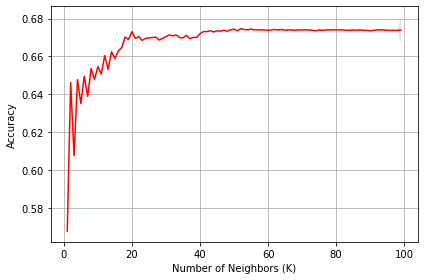

In [276]:
plt.plot(range(1, Ks), mean_acM, 'r')
plt.fill_between(range(1, Ks), mean_acM -1*std_acM, mean_acM +1*std_acM, alpha = 0.2 )
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

In [277]:
k=18
Knn_Main=KNeighborsClassifier(n_neighbors=k).fit(X_train_Main, y_train_Main)
yhat_Knn_Main=Knn_Main.predict(X_test_Main)
Knn_Main

KNeighborsClassifier(n_neighbors=18)

### KNN_Mainsample Accuracy

In [278]:
print("Accuracy of the Main sample Train set:", metrics.accuracy_score(y_train_Main, Knn_Main.predict(X_train_Main)))
print("Accuracy of the Main sample Test set:", metrics.accuracy_score(y_test_Main,yhat_Knn_Main))
print("KNN_Main Jaccard index: ", jaccard_score(y_test_Main,yhat_Knn_Main, average='weighted'))
print("KNN_Main f1 score: ", f1_score(y_test_Main,yhat_Knn_Main, average='weighted'))

Accuracy of the Main sample Train set: 0.6895238095238095
Accuracy of the Main sample Test set: 0.6702222222222223
KNN_Main Jaccard index:  0.4678212258556945
KNN_Main f1 score:  0.5762597110064923


In [305]:
print(classification_report(y_test_Main, yhat_Knn_Main))
print(accuracy_score(y_test_Main, yhat_Knn_Main))

              precision    recall  f1-score   support

           2       0.68      0.96      0.80      3022
           3       0.46      0.08      0.13      1347
           4       0.00      0.00      0.00       131

    accuracy                           0.67      4500
   macro avg       0.38      0.35      0.31      4500
weighted avg       0.60      0.67      0.58      4500

0.6702222222222223


In [279]:
print(confusion_matrix(y_test_Main, yhat_Knn_Main))

[[2911  109    2]
 [1239  105    3]
 [ 118   13    0]]


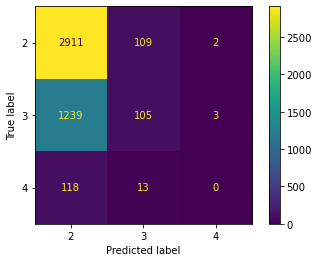

In [280]:
sklearn.metrics.plot_confusion_matrix(Knn_Main,X_test_Main, y_test_Main)

# KNN undersample

### KNN_Balanced (undersampled)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Finding the best K

In [281]:
Ks = 100
mean_ac = np.zeros((Ks-1))
std_ac = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_under,y_train_under)
    yhat_Knn_under=neigh.predict(X_test_under)
    mean_ac[n-1] = metrics.accuracy_score(y_test_under, yhat_Knn_under)
std_ac[n-1]=np.std(yhat_Knn_under==y_test_under)/np.sqrt(yhat_Knn_under.shape[0])
mean_ac

array([0.43, 0.41, 0.44, 0.44, 0.44, 0.45, 0.45, 0.46, 0.46, 0.46, 0.45,
       0.46, 0.46, 0.45, 0.46, 0.45, 0.45, 0.46, 0.46, 0.46, 0.46, 0.46,
       0.46, 0.47, 0.47, 0.46, 0.46, 0.46, 0.45, 0.46, 0.46, 0.46, 0.46,
       0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46,
       0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.47, 0.46, 0.46, 0.46, 0.47,
       0.47, 0.46, 0.46, 0.46, 0.46, 0.46, 0.47, 0.46, 0.46, 0.46, 0.46,
       0.46, 0.46, 0.46, 0.46, 0.46, 0.45, 0.46, 0.46, 0.46, 0.46, 0.45,
       0.45, 0.45, 0.46, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.46, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45])

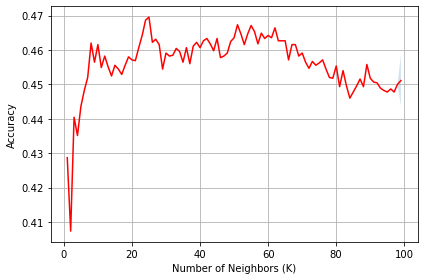

In [282]:
plt.plot(range(1, Ks), mean_ac, 'r')
plt.fill_between(range(1, Ks), mean_ac -1*std_ac, mean_ac +1*std_ac, alpha = 0.2 )
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

In [283]:
k=24
Knn_under=KNeighborsClassifier(n_neighbors=k).fit(X_train_under, y_train_under)
yhat_Knn_under=Knn_under.predict(X_test_under)
Knn_under

KNeighborsClassifier(n_neighbors=24)

# KNN_Undersample Accuracy

In [284]:
print("Accuracy of the under sample Train set:", metrics.accuracy_score(y_train_under, Knn_under.predict(X_train_Main)))
print("Accuracy of the under sample Test set:", metrics.accuracy_score(y_test_under,yhat_Knn_under))
print("KNN_under Jaccard index: ", jaccard_score(y_test_under,yhat_Knn_under, average='weighted'))
print("KNN_under f1 score: ", f1_score(y_test_under,yhat_Knn_under, average='weighted'))

Accuracy of the under sample Train set: 0.3314285714285714
Accuracy of the under sample Test set: 0.4686666666666667
KNN_under Jaccard index:  0.3103507614404901
KNN_under f1 score:  0.47218037604110336


In [306]:
print(classification_report(y_test_under, yhat_Knn_under))
print(accuracy_score(y_test_under, yhat_Knn_under))

              precision    recall  f1-score   support

           2       0.41      0.52      0.46      1495
           3       0.42      0.42      0.42      1524
           4       0.64      0.46      0.54      1481

    accuracy                           0.47      4500
   macro avg       0.49      0.47      0.47      4500
weighted avg       0.49      0.47      0.47      4500

0.4686666666666667


In [285]:
print(confusion_matrix(y_test_under, yhat_Knn_under))

[[780 553 162]
 [655 646 223]
 [447 351 683]]


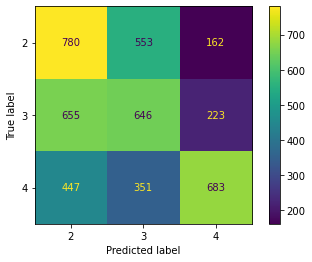

In [286]:
sklearn.metrics.plot_confusion_matrix(Knn_under,X_test_under, y_test_under)

# 5.2 SVM (Support Vector Machines)

SVM (Support Vector Machines) works by mapping data to a high-dimensional feature space so that data points can be
categorized, even when the data are not otherwise linearly separable. A separator between the
categories is found, then the data is transformed in such a way that the separator could be drawn
as a hyperplane. Following this, characteristics of new data can be used to predict the group to
which a new record should belong.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. In this section we will train both the "Main sample" and "under sample" SVM.

## SVM Main sample Model

In [157]:
from sklearn import svm

In [158]:
SVM_Main=svm.SVC(kernel='rbf')
SVM_Main.fit(X_train_Main, y_train_Main)
yhat_SVM_Main=SVM_Main.predict(X_test_Main)

In [159]:
print(confusion_matrix(y_test_Main, yhat_SVM_Main))
print(classification_report(y_test_Main, yhat_SVM_Main))
print(accuracy_score(y_test_Main, yhat_SVM_Main))

[[3013    9    0]
 [1323   24    0]
 [ 120   11    0]]
              precision    recall  f1-score   support

           2       0.68      1.00      0.81      3022
           3       0.55      0.02      0.03      1347
           4       0.00      0.00      0.00       131

    accuracy                           0.67      4500
   macro avg       0.41      0.34      0.28      4500
weighted avg       0.62      0.67      0.55      4500

0.6748888888888889


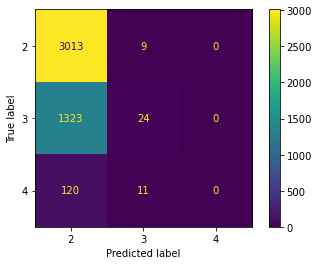

In [287]:
sklearn.metrics.plot_confusion_matrix(SVM_Main,X_test_Main, y_test_Main)

## SVM under sample Model

In [160]:
SVM_under=svm.SVC(kernel='rbf')
SVM_under.fit(X_train_under, y_train_under)
yhat_SVM_under=SVM_under.predict(X_test_under)

In [161]:
print(confusion_matrix(y_test_under, yhat_SVM_under))
print(classification_report(y_test_under, yhat_SVM_under))
print(accuracy_score(y_test_under, yhat_SVM_under))

[[ 470  886  139]
 [ 305 1020  199]
 [ 225  489  767]]
              precision    recall  f1-score   support

           2       0.47      0.31      0.38      1495
           3       0.43      0.67      0.52      1524
           4       0.69      0.52      0.59      1481

    accuracy                           0.50      4500
   macro avg       0.53      0.50      0.50      4500
weighted avg       0.53      0.50      0.50      4500

0.5015555555555555


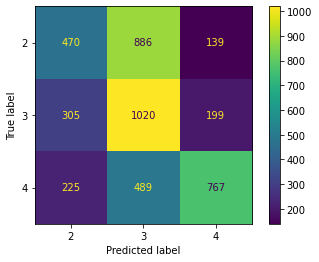

In [288]:
sklearn.metrics.plot_confusion_matrix(SVM_under,X_test_under, y_test_under)

# 5.3 Random  Forest

Random forest classifier (RF) is an ensemble tree-based learning algorithm. It is a set of decision trees from randomly selected subset of training set. Random forest algorithm aggregates the votes from different decision trees to decide the final class of the test object. Compared to KNN and SVM, Random forrest is a strong classifier with higer level of precesion and accuracy in many aspects. In this section will train and test RF algorithm in both our main sample and balanced sample sets and evaluate. 

# Main Sample (oroginal variation) model

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [290]:
RF_Main=RandomForestClassifier(n_estimators=40, random_state=0)
RF_Main.fit(X_train_Main, y_train_Main)
yhat_FR_Main=RF_Main.predict(X_test_Main)

In [228]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [291]:
print(confusion_matrix(y_test_Main, yhat_FR_Main))
print(classification_report(y_test_Main, yhat_FR_Main))
print(accuracy_score(y_test_Main, yhat_FR_Main))

[[2738  275    9]
 [1143  199    5]
 [ 103   23    5]]
              precision    recall  f1-score   support

           2       0.69      0.91      0.78      3022
           3       0.40      0.15      0.22      1347
           4       0.26      0.04      0.07       131

    accuracy                           0.65      4500
   macro avg       0.45      0.36      0.35      4500
weighted avg       0.59      0.65      0.59      4500

0.6537777777777778


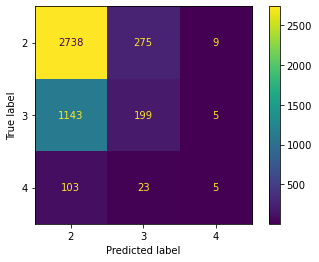

In [294]:
sklearn.metrics.plot_confusion_matrix(RF_Main, X_test_Main, y_test_Main)

# Undersample model

In [289]:
RF_under=RandomForestClassifier(n_estimators=40, random_state=0)
RF_under.fit(X_train_under, y_train_under)
yhat_FR_under=RF_under.predict(X_test_under)

In [292]:
print(confusion_matrix(y_test_under, yhat_FR_under))
print(classification_report(y_test_under, yhat_FR_under))
print(accuracy_score(y_test_under, yhat_FR_under))

[[ 702  524  269]
 [ 582  607  335]
 [ 108   60 1313]]
              precision    recall  f1-score   support

           2       0.50      0.47      0.49      1495
           3       0.51      0.40      0.45      1524
           4       0.68      0.89      0.77      1481

    accuracy                           0.58      4500
   macro avg       0.57      0.58      0.57      4500
weighted avg       0.57      0.58      0.57      4500

0.5826666666666667


Confusion Matrix

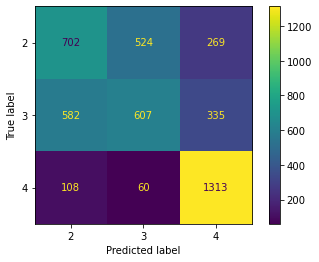

In [295]:
sklearn.metrics.plot_confusion_matrix(RF_under,X_test_under, y_test_under)

# 5.4 Grid Search for the BEST MODEL (undersample Random Forest)

It is clear that the undersampled Random Forest model was our best model with an overall accuracy of 0.58 and specially the specially higher precesion, recall and f1-scores in for the severity 4 class of the accidents, which is our key objective in this project. As per the confusion matrix also present very clearly, out of the total of true 1481 accidents of the category 4, 1313 have been correctly predicted by our machine learning algorithm. That is a very good performances compared to the five moels we have. 

However, in developing the RF model, we did not specify the model paramters hence the we can check if we have the opportunity to further imporve our model to obtain a best model. For this we can call for a Grid Search. 

In the Grid search we will give a set of value ranges for important patameters, specially n_estimators. Once the Grid is run, we can call for the parameter combination with the optimized accutacy and performances. In this section this procedure is conducted and given below step by step. 

In [296]:
import sklearn
sklearn.__version__

'0.23.1'

In [297]:
from sklearn.model_selection import RandomizedSearchCV

In [298]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF_under.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [299]:
import joblib

In [300]:
# Perform grid search
# -------------------

parameters = {
     'max_depth': [70, 80, 90, 100, 110, 120],
     'min_samples_split': [2, 50, 100, 500],
     'n_estimators': [30, 40, 80, 120,160,200 ]
 }
clf_RF_gridsearch = RandomForestClassifier(random_state=None, n_jobs=-1)
scorer = make_scorer(fbeta_score, beta=1, average='weighted')
grid_obj_RF_under = GridSearchCV(clf_RF_gridsearch, parameters, scorer, verbose=4)
grid_obj_RF_under = grid_obj_RF_under.fit(X_train_under, y_train_under)


# -----------------------------------------------------------------


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] max_depth=70, min_samples_split=2, n_estimators=30 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=70, min_samples_split=2, n_estimators=30, score=0.556, total=   1.8s
[CV] max_depth=70, min_samples_split=2, n_estimators=30 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=30, score=0.575, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=30 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=70, min_samples_split=2, n_estimators=30, score=0.554, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=30 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=30, score=0.565, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=30 ..............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=70, min_samples_split=2, n_estimators=30, score=0.547, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=40 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=40, score=0.576, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=40 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=40, score=0.589, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=40 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=40, score=0.568, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=40 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=40, score=0.567, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=40 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=40, score=0.560, total=   0.2s
[CV] max_depth=70, min_samples_split=2, n_estimators=80 ..............
[CV]  max_depth=70, min_samples_split=2, n_estimators=80, score=

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.7min finished


In [301]:
grid_obj_RF_under.best_params_

{'max_depth': 90, 'min_samples_split': 100, 'n_estimators': 120}

In [ ]:
{'max_depth': 80, 'min_samples_split': 50, 'n_estimators': 40}

In [302]:
RF_Grid_under=RandomForestClassifier(n_estimators=120,max_depth=90, min_samples_split=100, random_state=0)
RF_Grid_under.fit(X_train_under, y_train_under)
yhat_FR_Grid_under=RF_Grid_under.predict(X_test_under)

In [303]:
print(confusion_matrix(y_test_under, yhat_FR_Grid_under))
print(classification_report(y_test_under, yhat_FR_Grid_under))
print(accuracy_score(y_test_under, yhat_FR_Grid_under))

[[ 705  502  288]
 [ 533  655  336]
 [  95   41 1345]]
              precision    recall  f1-score   support

           2       0.53      0.47      0.50      1495
           3       0.55      0.43      0.48      1524
           4       0.68      0.91      0.78      1481

    accuracy                           0.60      4500
   macro avg       0.59      0.60      0.59      4500
weighted avg       0.59      0.60      0.59      4500

0.6011111111111112


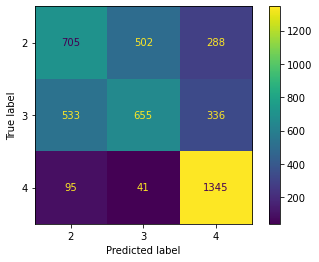

In [304]:
sklearn.metrics.plot_confusion_matrix(RF_Grid_under,X_test_under, y_test_under)

Undersampled Random Forest model ran with the optimized parameters obtained from the Grid search clearly improved our model. It is clear that, Grid seach and application of optimum paramter values is a tuning procedure to improve the model performances of machine learning models. All the models including the Grid FR model that we developed are discussed in section section 6. 

# 6. DISCUSSION 

In [307]:
Results_Summary=pd.read_csv("C:/Users/sas/Desktop/MyPython/FINAL RESULTS OF THE PROJECT.csv")

In [308]:
Results_Summary

,Classifier,KNN_main,KNN_under,SVM-Main,SVM_under,RF_Main,RF_under,RF_Grid_under,Unnamed: 8
0,Overall Acuracy,0.670222,0.468667,0.674889,0.501556,0.653778,0.582667,0.601111,NaN
1,Severity 2 precision,0.680000,0.410000,0.680000,0.470000,0.690000,0.500000,0.530000,NaN
2,Severity 3 precision,0.460000,0.420000,0.550000,0.430000,0.400000,0.510000,0.550000,NaN
3,Severity 4 precision,0.000000,0.640000,0.000000,0.690000,0.260000,0.680000,0.680000,NaN
4,Severity 2 recall,0.960000,0.520000,1.000000,0.310000,0.910000,0.470000,0.470000,NaN
5,Severity 3 recall,0.080000,0.420000,0.020000,0.670000,0.150000,0.400000,0.430000,NaN
6,Severity 3 recall,0.000000,0.460000,0.000000,0.520000,0.040000,0.890000,0.910000,NaN
7,Severity 2 f1-score,0.800000,0.460000,0.810000,0.380000,0.780000,0.490000,0.500000,NaN
8,Severity 3 f1-score,0.130000,0.420000,0.030000,0.520000,0.220000,0.450000,0.480000,NaN
9,Severity 4 f1-score,0.000000,0.540000,0.000000,0.590000,0.070000,0.770000,0.780000,NaN


## Model performances:

Table above illustrates performances of all 7 models we developed. KNN_main model records highest the overall accuracy. But, we must not forget that all the main sample models used an imbalanced data set. Overall accuracy score is the the sum of true positives and true negatives divided by the total number of samples. This is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance. 

Therefore, overall accurasy of models that used the main sample (imbalanced sample) should not be considered in evaluating the model performances. However, for models with the balanced samples, overall accuracy is a reasonable indicator of the performances. Therefore, both models from undersampled Random forrest algorithms give better results while RF_Grid_under model being the best. 

Impact of having an imbalanced sample is very clear according to the results. KNN_Main, SVM_Main and even RF_Main performed very poor in almost all indicators in corectly predicting accidents of the class of Severity 4. In practical our key objective is to predict the class of a possible or probable accident under a given weather conditions. However, we must not forget that, the higest priority and the most important objective of our machine learning models must be the ability to predict probable accidents of the Severity category 4. 

Almost all imbalanced samples fail in performing for this objective. Both KNN and SVM models are highly affected by the imbalance of the samples as all the performance indicators with respect to the minority class i snothing but zero for both these models. Compared to them RF models have a higher robustness to imbalance samples also as the precision beong 0.26. Still, the same model performs very much poorly in other indicators too. 

However, RF with a balanced sample clearly performed wella dn predict much better. The best model therefore is the RF_Grid_under model. The same is well evedent from comparing the confusion metrices for wach model.

For all the imbalanced sample models lover diagonal value wich indicates the correct predictions of accidents of the severity level 4 is 0 or very low. But, undersamples models performed well with higher values in the diagonal values. Specially the RF_under and RF_Grid_under. 



# CONCLUSIONS

Compared to KNN and SVM Random Forrest performes much better in classification needs. 

Imbalance samples leads to very poor results in predicting minority classed. Balance samples using undersampling or oversampling techniques would produce much better results.

Considering these ovewrall results it is clear the the Best model out of these 7 is RF_Grid_Under. It must be noted that we only took the approach of undersampling but not the oversampling method with SMOTE in this project. 

Since our data set was very big and also our random samples consited with 15000 data points statistically we can be satisfied with the sample size as long as we preseve the randomness. Therefore additional efforts were not taken to conduct oversampling method. But those also can be taken into consderation for any future work of this project or a similar project.

There are further steps we can take to improve the performances of the model and fine tune. There are also new approaches such as XG Boost that might out perform RF models. Such approaches are also may be considered in future imporvments of this project or any similar projects.

# Thank you! 